In [4]:
import numpy as np
import matplotlib.pyplot as plt

folder_path = '/Users/md/Library/CloudStorage/OneDrive-Personal/Mohit/RIT/trading/codebases/stockPredict/time_series_benchmarking/results/Crossformer_ETTh1_il168_ol1_sl6_win2_fa10_dm256_nh4_el3_itr0/'

# Read data from pred.npy and true.npy
preds = np.load(folder_path + 'pred.npy', allow_pickle=True)
trues = np.load(folder_path + 'true.npy', allow_pickle=True)

# Check if the data is saved in a list
if type(preds) is np.ndarray:
    preds = [preds]
    trues = [trues]

In [5]:
type(preds)

list

In [6]:
# Assuming RET is the first variable, index 0
ret_preds = [pred[:, :, 0] for pred in preds]  # Adjust indexing based on your data shape
ret_trues = [true[:, :, 0] for true in trues]  # Adjust indexing based on your data shape

ret_preds = np.concatenate(ret_preds, axis=0)
ret_trues = np.concatenate(ret_trues, axis=0)

print("Predictions shape:", ret_preds.shape)
print("True values shape:", ret_trues.shape)

Predictions shape: (2880, 1)
True values shape: (2880, 1)


In [7]:
ret_preds

array([[0.7081434 ],
       [0.7079723 ],
       [0.70842737],
       ...,
       [0.79613507],
       [0.79175204],
       [0.777671  ]], dtype=float32)

In [8]:
ret_preds.flatten()

array([0.7081434 , 0.7079723 , 0.70842737, ..., 0.79613507, 0.79175204,
       0.777671  ], dtype=float32)

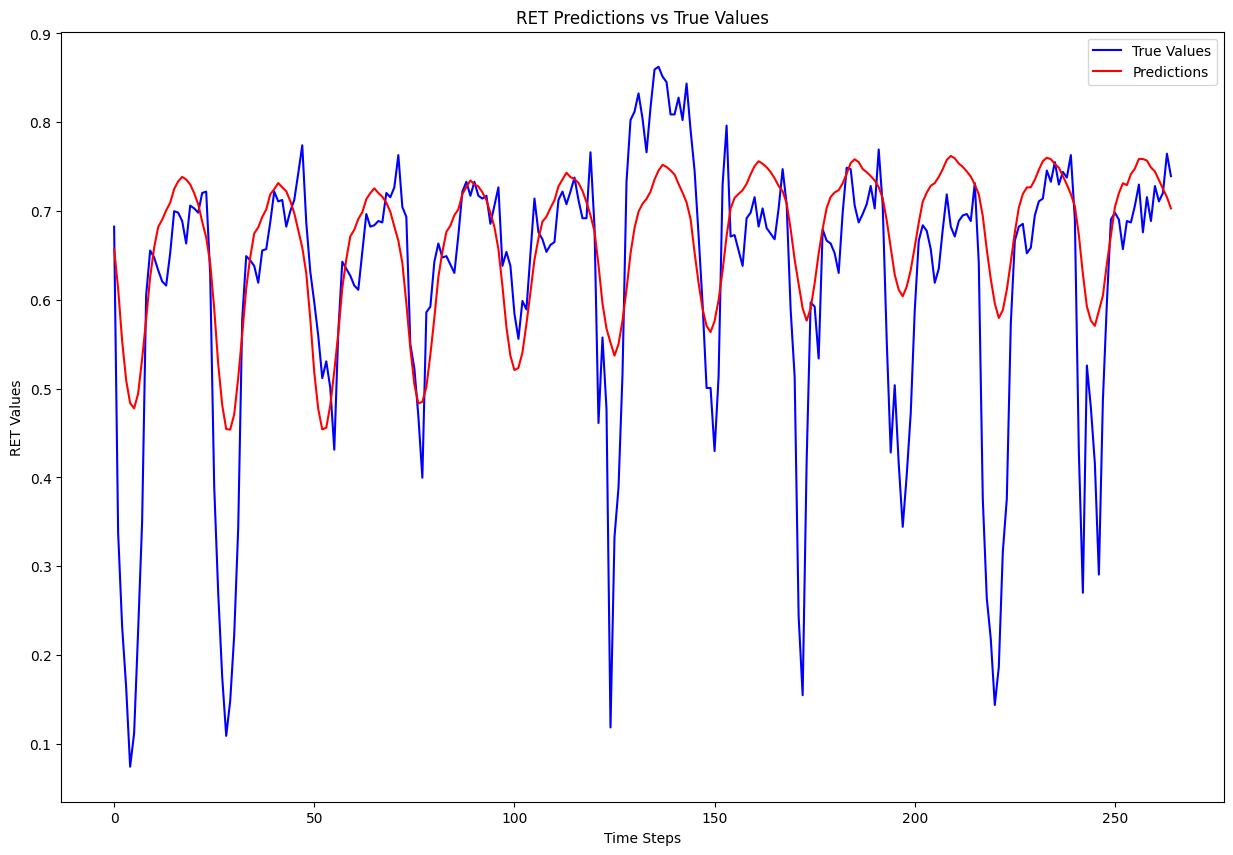

In [12]:
a= 800
b = 1065

plt.figure(figsize=(15, 10))
plt.plot(ret_trues.flatten()[a:b], label='True Values', color='blue')  # Flatten if data has more than 1 dimension per timestep
plt.plot(ret_preds.flatten()[a:b], label='Predictions', color='red')
plt.title('RET Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('RET Values')
plt.legend()
plt.show()


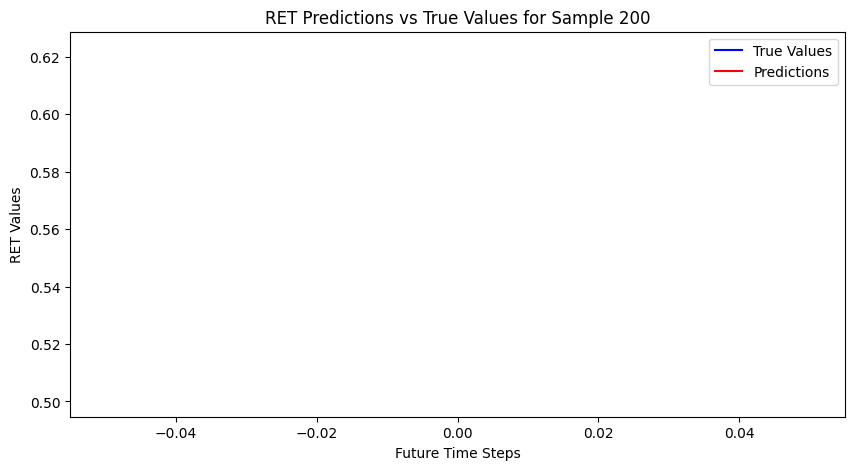

In [10]:
import matplotlib.pyplot as plt

# Choose a sample index, e.g., 0 for the first sample
sample_index = 200

plt.figure(figsize=(10, 5))
plt.plot(ret_trues[sample_index], label='True Values', color='blue')
plt.plot(ret_preds[sample_index], label='Predictions', color='red')
plt.title(f'RET Predictions vs True Values for Sample {sample_index}')
plt.xlabel('Future Time Steps')
plt.ylabel('RET Values')
plt.legend()
plt.show()


In [2]:
# plot the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

NameError: name 'mdates' is not defined

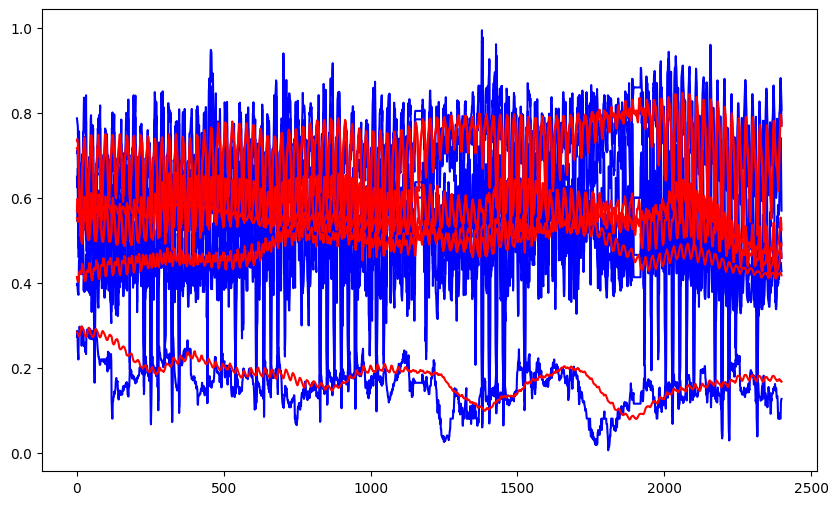

In [11]:

save_pred = False

for i in range(len(preds)):
    pred = preds[i]
    true = trues[i]
    
    

    pred = pred.mean(axis=1)
    true = true.mean(axis=1)

    # plot only the last 24 hours
    pred = pred[-2400:]
    true = true[-2400:]


    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(true, label='True', color='blue')
    ax.plot(pred, label='Predicted', color='red')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.xticks(rotation=45)
    plt.title('Crossformer')
    plt.legend()
    plt.show()
    if save_pred:
        fig.savefig(folder_path + f'plot_{i}.png')
    

1

In [6]:
preds

array([[[[ 0.3391638 ,  0.3782977 ,  0.5358027 , ..., -0.06883225,
           0.43475145, -1.0117142 ],
         [ 0.3370298 ,  0.4766886 ,  0.5483122 , ..., -0.07379773,
           0.49365142, -1.0423534 ],
         [ 0.2910675 ,  0.48586243,  0.5077372 , ..., -0.19825625,
           0.5456114 , -0.940686  ],
         ...,
         [-0.04859549, -0.628492  , -0.04213908, ...,  0.21184486,
           0.6443997 , -0.95409495],
         [ 0.06929362, -0.16014302,  0.21580738, ...,  0.03428665,
           0.62752277, -0.982129  ],
         [ 0.37592927,  0.46113515,  0.5222129 , ...,  0.11320424,
           0.5711163 , -0.97335446]],

        [[ 0.31642276,  0.62612075,  0.49476117, ..., -0.2469944 ,
           0.40666884, -0.9992341 ],
         [ 0.23095216,  0.59349716,  0.45703983, ..., -0.34879866,
           0.420811  , -1.0230366 ],
         [ 0.30131927,  0.53283525,  0.47825843, ..., -0.5166725 ,
           0.42342427, -0.9396267 ],
         ...,
         [ 0.08560276, -0.11671533